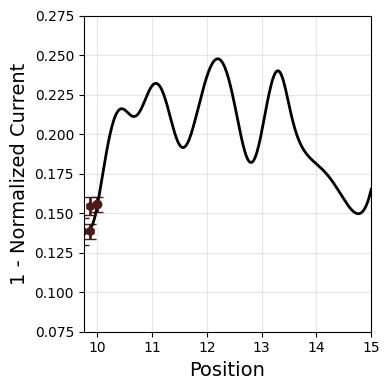

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# 原始完整数据（保留用于拟合）
nt_position = [10, 10, 11, 11, 12, 12, 13, 13, 14, 15]
shifted_factor = [14.2, 14.4, 14.6, 14.8, 15]

data = np.array([
    [0.1819, np.nan, np.nan, 0.2198, 0.1938, np.nan, 0.2450, np.nan, 0.2494, 0.1724],  # 100
    [0.1851, 0.2026, 0.2027, 0.2082, 0.1898, 0.2072, 0.2098, 0.2302, 0.2210, 0.1633],  # 120
    [0.1384, np.nan, 0.2085, 0.2170, 0.2022, np.nan, 0.1872, 0.2090, 0.2008, 0.1508],  # 140
    [0.1384, 0.1545, 0.2093, 0.2296, 0.2158, np.nan, 0.1765, 0.1924, 0.1865, 0.1543],  # 160
    [0.1557, np.nan, 0.2306, 0.2465, 0.2290, 0.2373, 0.1870, 0.1989, 0.1867, 0.1636]   # 180
])
data_rms = np.array([
    [0.0122, np.nan, np.nan, 0.0051, 0.0051, np.nan, 0.0054, np.nan, 0.0060, 0.0050],
    [0.0091, 0.0150, 0.0065, 0.0049, 0.0055, 0.0046, 0.0066, 0.0051, 0.0050, 0.0049],
    [0.0088, np.nan, 0.0074, 0.0047, 0.0052, np.nan, 0.0051, 0.0047, 0.0047, 0.0039],
    [0.0045, 0.0057, 0.0052, 0.0045, 0.0041, np.nan, 0.0042, 0.0048, 0.0040, 0.0037],
    [0.0048, np.nan, 0.0052, 0.0042, 0.0044, 0.0043, 0.0041, 0.0040, 0.0037, 0.0040]
])

fmts = ['^', 's', 'p', 'h', 'o']
colors_D10 = ['#4d1919']  # D10 统一用一种颜色（或保留两色）

fig, ax = plt.subplots(figsize=(4, 4))

# ========================
# 第一步：只绘制 D10 (nt=10) 的数据点
# ========================
for row in range(data.shape[0]):
    for col in range(2):  # nt=10 对应 col=0 和 col=1
        if not np.isnan(data[row, col]) and not np.isnan(data_rms[row, col]):
            x_val = 10 * shifted_factor[row] / 15
            plt.errorbar(
                x_val, data[row, col], data_rms[row, col],
                fmt=fmts[row], linewidth=2, capsize=4,
                color=colors_D10[0], markersize=6
            )

# ========================
# 第二步：用全部数据（D10-D15）拟合样条曲线
# ========================
all_x_full = []
all_y_full = []

for row in range(data.shape[0]):
    for col in range(data.shape[1]):
        if not np.isnan(data[row, col]) and not np.isnan(data_rms[row, col]):
            x_val = nt_position[col] * shifted_factor[row] / 15
            all_x_full.append(x_val)
            all_y_full.append(data[row, col])

# 处理重复 x 值（取 y 平均）
x_arr = np.array(all_x_full)
y_arr = np.array(all_y_full)
unique_x = np.unique(x_arr)
avg_y = [np.mean(y_arr[x_arr == x]) for x in unique_x]

# 样条拟合
if len(unique_x) > 3:
    try:
        spline = UnivariateSpline(unique_x, avg_y, s=0.001, k=min(4, len(unique_x)-1))
        x_smooth = np.linspace(9.85, max(unique_x), 300)
        y_smooth = spline(x_smooth)
        plt.plot(x_smooth, y_smooth, 'k-', linewidth=2)
    except Exception as e:
        print("样条拟合失败:", e)

# ========================
# 设置图形
# ========================
plt.xlim(9.75, 15)
plt.ylim(0.075, 0.275)
plt.xlabel('Position', fontsize=14)
plt.ylabel('1 - Normalized Current', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('spline_normal_D10_points_full_fit.svg', format='svg', dpi=300, bbox_inches='tight')

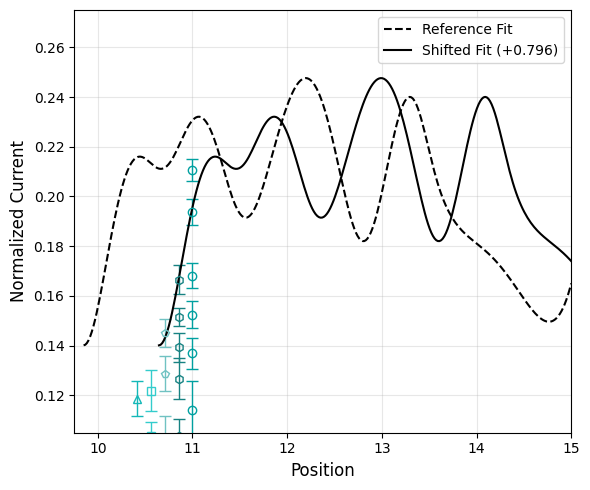

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

# === G6P4D11 数据 ===
G6P3D11_position = [11, 11, 11, 11, 11, 11]
shifted_factor = [14.2, 14.4, 14.6, 14.8, 15]

G6P3D11 = np.array([
    [0.1186, np.nan, np.nan, np.nan, np.nan, np.nan],
    [0.1037, 0.1219, np.nan, np.nan, np.nan, np.nan],
    [0.1029, 0.1288, 0.1451, np.nan, np.nan, np.nan],
    [0.1036, 0.1268, 0.1394, 0.1515, 0.1666, np.nan],
    [0.1140, 0.1370, 0.1524, 0.1682, 0.1938, 0.2106]
])
G6P3D11_rms = np.array([
    [0.0070, np.nan, np.nan, np.nan, np.nan, np.nan],
    [0.0055, 0.0083, np.nan, np.nan, np.nan, np.nan],
    [0.0088, 0.0070, 0.0057, np.nan, np.nan, np.nan],
    [0.0070, 0.0082, 0.0059, 0.0036, 0.0059, np.nan],
    [0.0116, 0.0062, 0.0054, 0.0051, 0.0053, 0.0043]
])

# 颜色与符号（按行分配）
colors = ['#14b8b8', '#33cccc', '#70c2c2', '#178282', '#00a0a0']  # 补齐第5行颜色
fmts = ['^', 's', 'p', 'h', 'o']

# 创建图形
fig, ax = plt.subplots(figsize=(6, 5))

# === 绘制 G6P3D11 数据点 ===
for row in range(G6P3D11.shape[0]):
    for col in range(G6P3D11.shape[1]):
        if not np.isnan(G6P3D11[row, col]) and not np.isnan(G6P3D11_rms[row, col]):
            x_val = G6P3D11_position[col] * shifted_factor[row] / 15
            plt.errorbar(
                x_val,
                G6P3D11[row, col],
                yerr=G6P3D11_rms[row, col],
                fmt=fmts[row],
                color=colors[row],
                markerfacecolor='none',
                capsize=4,
                markersize=6,
                elinewidth=1,
                linestyle='None'
            )

# === 构建用于拟合的完整数据集（假设来自之前的 D10-D15）===
# 这里我们复用您之前提供的完整 data 和 nt_position
nt_position = [10, 10, 11, 11, 12, 12, 13, 13, 14, 15]
data = np.array([
    [0.1819, np.nan, np.nan, 0.2198, 0.1938, np.nan, 0.2450, np.nan, 0.2494, 0.1724],
    [0.1851, 0.2026, 0.2027, 0.2082, 0.1898, 0.2072, 0.2098, 0.2302, 0.2210, 0.1633],
    [0.1384, np.nan, 0.2085, 0.2170, 0.2022, np.nan, 0.1872, 0.2090, 0.2008, 0.1508],
    [0.1384, 0.1545, 0.2093, 0.2296, 0.2158, np.nan, 0.1765, 0.1924, 0.1865, 0.1543],
    [0.1557, np.nan, 0.2306, 0.2465, 0.2290, 0.2373, 0.1870, 0.1989, 0.1867, 0.1636]
])

# 收集所有有效 (x, y) 点用于拟合
all_x, all_y = [], []
for row in range(data.shape[0]):
    for col in range(data.shape[1]):
        if not np.isnan(data[row, col]):
            x_val = nt_position[col] * shifted_factor[row] / 15
            all_x.append(x_val)
            all_y.append(data[row, col])

# 去重并平均（处理重复 x）
x_arr = np.array(all_x)
y_arr = np.array(all_y)
unique_x = np.unique(x_arr)
avg_y = [np.mean(y_arr[x_arr == x]) for x in unique_x]

# 样条拟合
if len(unique_x) > 3:
    try:
        spline = UnivariateSpline(unique_x, avg_y, s=0.001, k=min(4, len(unique_x)-1))
        x_smooth = np.linspace(9.85, max(unique_x), 300)
        y_smooth = spline(x_smooth)
        
        # 绘制两条拟合线
        plt.plot(x_smooth, y_smooth, 'k--', linewidth=1.5, label='Reference Fit')
        plt.plot(x_smooth + 0.796, y_smooth, 'k-', linewidth=1.5, label='Shifted Fit (+0.796)')
    except Exception as e:
        print("样条拟合失败:", e)

# === 图形设置 ===
plt.xlim(9.75, 15)
plt.ylim(0.105, 0.275)
plt.xlabel('Position', fontsize=12)
plt.ylabel('Normalized Current', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('G6P3D11_with_dual_fit.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()